In [1]:
!pip install wordcloud

In [2]:
#Importing all the necessary python libraries that we need for this task:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [15]:
#Import csv in pandas dataframe
data = pd.read_csv("flipkart_product.csv", encoding='latin1', error_bad_lines=False)

<ipython-input-15-2fbae1b95d14>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("flipkart_product.csv", encoding='latin1', error_bad_lines=False)
<ipython-input-15-2fbae1b95d14>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("flipkart_product.csv", encoding='latin1', error_bad_lines=False)


In [16]:
#print first 5 rows of the data
data.head(5)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [19]:

#Clean and prepare the columns contining reviews before heading to sentiment analysis
import nltk
import re

nltk.download("stopwords")
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
def clean(text):
    text=str(text).lower()
    text=re.sub("\[.*?\]","",text)
    text=re.sub("https?://\S+|www\.\S+","",text)
    text=re.sub("<.*?>+","",text)
    text=re.sub("[%s]"% re.escape(string.punctuation),"",text)
    text=re.sub("\n","",text)
    text=re.sub("\w*\d\w*","",text)
    text=[word for word in text.split(" ") if word not in stopword]
    text=" ".join(text)
    return text

In [21]:
data["Review"] = data["Review"].apply(clean)

In [22]:
data.head(5)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,super,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,fair,Ok ok product


In [23]:
idx = data.index[data['Rate'] == 'Bajaj DX 2 L/W Dry Iron'].tolist()
idx1 = data.index[data['Rate'] == 'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)'].tolist()
idx2 = data.index[data['Rate'] == 'Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)'].tolist()

In [28]:
data.drop([17589, 17299, 17906], inplace=True)

In [29]:
#The Rating column of the data contains the ratings given by every reviewer. So lets have a look at how most of the people rate the products they buy from the Flipcart
rating = data["Rate"].value_counts()
numbers=rating.index
quantity=rating.values

In [30]:
rating

5                                                              74145
4                                                              27434
1                                                              13667
3                                                              11314
5                                                               9387
2                                                               4506
4                                                               3450
1                                                               1973
3                                                               1153
2                                                                533
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)         1
Bajaj DX 2 L/W Dry Iron                                            1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)        1
Name: Rate, dtype: int64

In [31]:
numbers

Index([                                                          '5',
                                                                 '4',
                                                                 '1',
                                                                 '3',
                                                                   5,
                                                                 '2',
                                                                   4,
                                                                   1,
                                                                   3,
                                                                   2,
        'Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)',
                                           'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)'],
      dtype='object')

In [32]:
quantity

array([74145, 27434, 13667, 11314,  9387,  4506,  3450,  1973,  1153,
         533,     1,     1,     1])

In [33]:
data["Rate"].value_counts()

5                                                              74145
4                                                              27434
1                                                              13667
3                                                              11314
5                                                               9387
2                                                               4506
4                                                               3450
1                                                               1973
3                                                               1153
2                                                                533
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)         1
Bajaj DX 2 L/W Dry Iron                                            1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)        1
Name: Rate, dtype: int64

In [34]:
data["Rate"].value_counts() == 1

5                                                              False
4                                                              False
1                                                              False
3                                                              False
5                                                              False
2                                                              False
4                                                              False
1                                                              False
3                                                              False
2                                                              False
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)      True
Bajaj DX 2 L/W Dry Iron                                         True
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)     True
Name: Rate, dtype: bool

In [35]:
data["Rate"].value_counts()

5                                                              74145
4                                                              27434
1                                                              13667
3                                                              11314
5                                                               9387
2                                                               4506
4                                                               3450
1                                                               1973
3                                                               1153
2                                                                533
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)         1
Bajaj DX 2 L/W Dry Iron                                            1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)        1
Name: Rate, dtype: int64

In [36]:
data["Rate"].value_counts()

5                                                              74145
4                                                              27434
1                                                              13667
3                                                              11314
5                                                               9387
2                                                               4506
4                                                               3450
1                                                               1973
3                                                               1153
2                                                                533
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)         1
Bajaj DX 2 L/W Dry Iron                                            1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)        1
Name: Rate, dtype: int64

In [44]:
import plotly.express as px
figure = px.pie(data,
               values=quantity,
               names=numbers,hole=0.5)

figure.show()

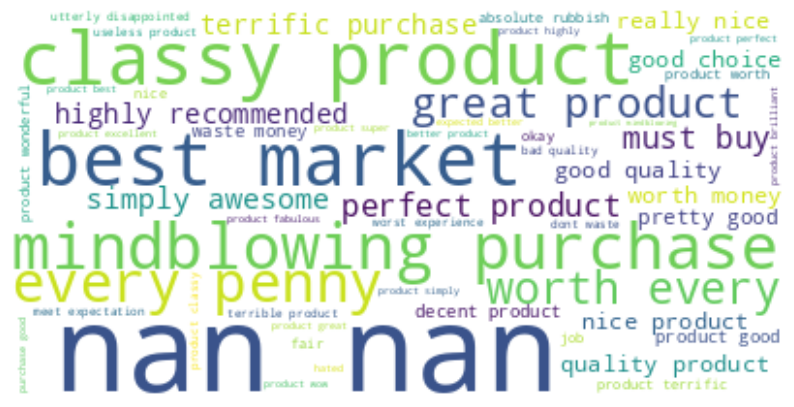

In [45]:
#use a word cloud to visualize the most used words in the reviews column:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white").generate(text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
#Analyze the sentimates of Flipcart reviews by adding three columns in dataset as Positive,Negative and Neutral-
#by clustring the sentiment score of the review
nltk.download("vader_lexicon")
sentiments=SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]

data = data[["Review","Positive","Negative","Neutral"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [40]:
data.head(5)

,Review,Positive,Negative,Neutral
0,super,1.0,0.000,0.000
1,awesome,1.0,0.000,0.000
2,fair,1.0,0.000,0.000
3,useless product,0.0,0.737,0.263
4,fair,1.0,0.000,0.000


In [41]:
#Now let's see how most of the reviewers think about the product Service of flipcart
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("Positive 😀")
    elif (b>a) and (b>c):
        print("Negative 😡")
    elif (c>a) and (c>b):
        print("Neutral 😐")

In [42]:
sentiment_score(x,y,z)

Positive 😀


In [43]:
#So most most of the reviews are Positive, let's have a look at the total of Positive, Negative and Neutral sentiment score-
#to find a conclusion about Flipcart reviews
print("Positive",x)
print("Negative",y)
print("Neutral",z)

Positive 86704.91999998062
Negative 8267.714000000089
Neutral 52587.37000000471
